# Basic EDA

In [130]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/ml-latest/ratings.csv')

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## 1. Checking for Outliers

In [4]:
x = data['userId'].value_counts();

In [5]:
users = x.index[:]
counts = x.iloc[:]

In [6]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [7]:
filtered = reject_outliers(counts, m= 2)
reject_outliers(counts, m= 2)[:10]

64857     523
42018     523
40282     523
205042    523
170942    523
66412     523
109957    523
199247    523
65459     523
181264    523
Name: userId, dtype: int64

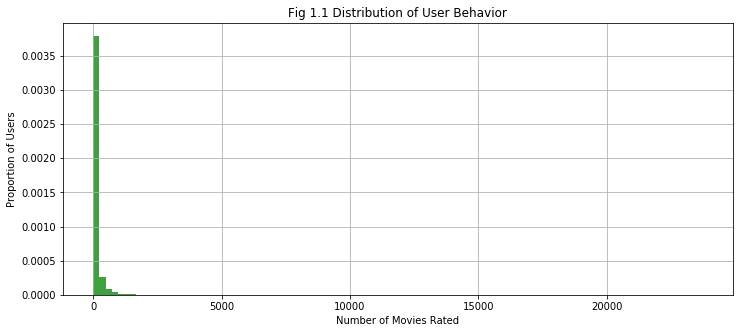

In [103]:
plt.figure(figsize=(12,5))
plt.hist(counts, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Number of Movies Rated')
plt.ylabel('Proportion of Users')
plt.title('Fig 1.1 Distribution of User Behavior')
#plt.axis([10, 100])
plt.grid(True)
plt.show()

In [10]:
print('No. of Outliers ( users that have rated abnormally high number of movies): ',len(counts)-len(filtered))

No. of Outliers ( users that have rated abnormally high number of movies):  9448


In [40]:
def hard_threshold(data):
    data = data[data < 100]
    return data[data > 10]

In [41]:
filtered_2 = hard_threshold(counts)

In [42]:
print('No. of Outliers ( users that have rated abnormally high number of movies): ',len(counts)-len(filtered_2))

No. of Outliers ( users that have rated abnormally high number of movies):  114912


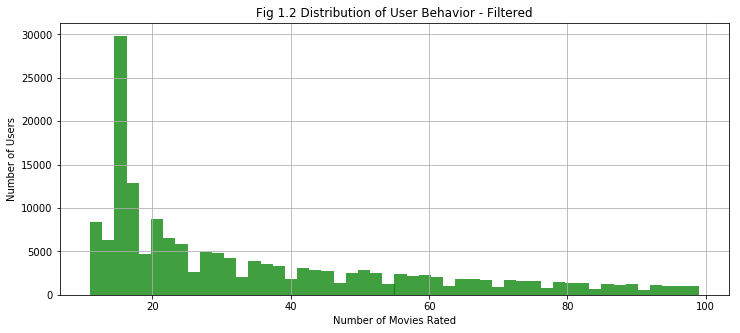

In [102]:
plt.figure(figsize=(12,5))
plt.hist(filtered_2, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Number of Movies Rated')
plt.ylabel('Number of Users')
plt.title('Fig 1.2 Distribution of User Behavior - Filtered')
#plt.axis([10, 100])
plt.grid(True)
plt.show()

> **Observations:**
- Of the 2,83,228 users using Movies around 69,000 people rated more then 100 movies and 45,912 users have rated less than 10 movies.
- We would want to remove those users who have rated the movies highly from the catalogue as it maybe from a bot account or professional reviewer. Since we are trying to model the interrests of the larger public it would make sense to take the data of users who haven't rated more than 100 movies.
- Also new users who have rated less than 10 movies, present the classical cold start problem. We should not use them in building our recommender simply because enough data is not available.

## 2. Checking General Distribution Pattern in Ratings

In [140]:
y = data['rating'].value_counts()

In [141]:
y

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

In [142]:
ratings = y.iloc[:]
rcounts = y.index[:]

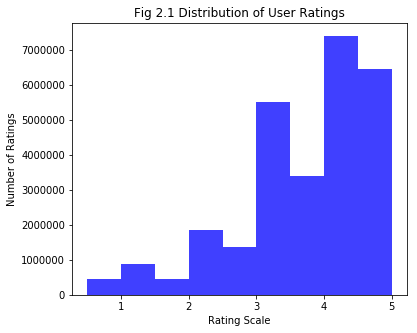

In [152]:
plt.figure(figsize=(6,5))
plt.hist(data['rating'], 9, density=False, facecolor='b', alpha=0.75, histtype ='bar')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.title('Fig 2.1 Distribution of User Ratings')
plt.show()

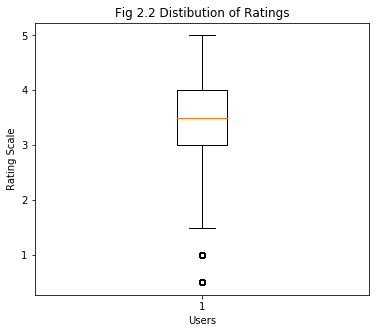

In [150]:
plt.figure(figsize=(6,5))
plt.boxplot(data['rating'])
plt.xlabel('Users')
plt.ylabel('Rating Scale')
plt.title('Fig 2.2 Distibution of Ratings')
plt.show()

> **Observations: **
- We see that the average rating is centred around the 3.5 and the interquartile range is between 3-4. A lot of movies have been highly rated.

## 3. Checking the Number of Ratings collected over the Years

In [29]:
date = list()
for i in tqdm(data['timestamp']):
    date.append(datetime.datetime.fromtimestamp(i).strftime('%Y'))

100%|██████████| 27753444/27753444 [03:24<00:00, 135534.03it/s]


In [30]:
data['ratedYear'] = date

In [31]:
data.head()

,userId,movieId,rating,timestamp,ratedYear
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009


In [32]:
z = data['ratedYear'].value_counts()

In [33]:
ycounts = z.iloc[:]
years = z.index[:]

In [34]:
df = pd.DataFrame({'Year':years,'counts':ycounts})

In [35]:
df.reset_index(drop =True)
df.sort_values(by=['Year'],inplace = True)

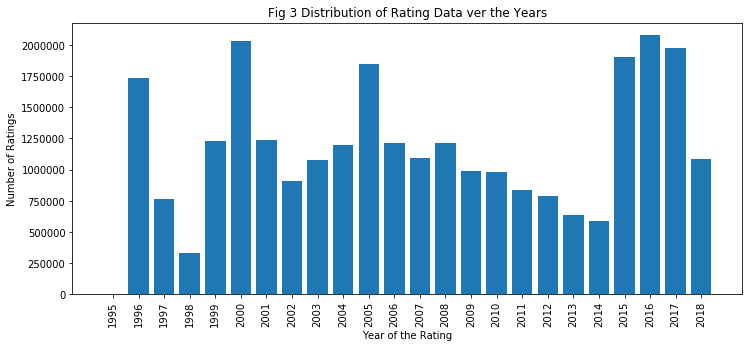

In [101]:
plt.figure(figsize=(12,5))
plt.bar(df.Year, df.counts )
plt.xticks(rotation = 90)
plt.xlabel('Year of the Rating')
plt.ylabel('Number of Ratings')
plt.title('Fig 3 Distribution of Rating Data over the Years')
plt.show()

> **Observations: **
- In this particular sample of dataset provided from Movielens, we see a sudden resurgence in the number of available ratings beginning from the year 2015. 

## 4. Popularity Curve

In [118]:
pc = data['movieId'].value_counts()[:1000]
xax = list(range(0,1000))

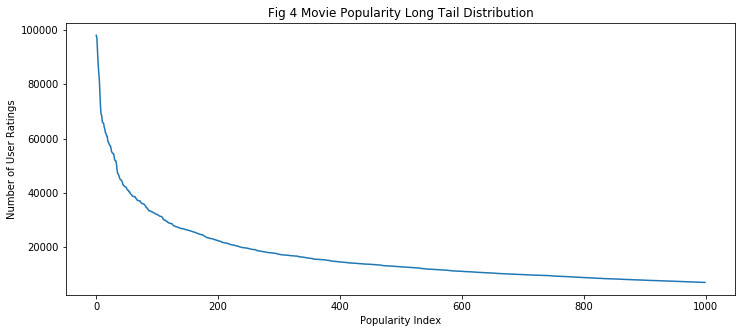

In [122]:
plt.figure(figsize=(12,5))
plt.plot(xax, pc)
plt.xlabel('Popularity Index')
plt.ylabel('Number of User Ratings')
plt.title('Fig 4 Movie Popularity Long Tail Distribution')
plt.show()

> **Observations: **
- The Popularity of Movies follow the long tail distibution which exemplifies the pgenomenon of rich gets richer. More Popular movies get more ratings. 

## 5. Checking the Lifespan of Average Reviewer on the Movielens Data? 

In [38]:
df1 = data.groupby('ratedYear').rating.agg("mean")

ratedYear
1995    3.750000
1996    3.554083
1997    3.592693
1998    3.522349
1999    3.617370
2000    3.577697
2001    3.535731
2002    3.485196
2003    3.471105
2004    3.426885
2005    3.431740
2006    3.460285
2007    3.464102
2008    3.527500
2009    3.490636
2010    3.510094
2011    3.535990
2012    3.585928
2013    3.626083
2014    3.596033
2015    3.574954
2016    3.541090
2017    3.556288
2018    3.559862
Name: rating, dtype: float64

In [46]:
df2 = data.groupby('userId').ratedYear.agg(["min","max"])
df2

,min,max
userId,,
1,2009,2009
2,2007,2007
3,1999,1999
4,2005,2008
5,2008,2008
6,1996,1996
7,2009,2009
8,1997,1997
9,1999,1999


In [55]:
xx= np.asarray(df2['max'].iloc[:])
yy= np.asarray(df2['min'].iloc[:])

In [59]:
value = list()
for i in range(len(df2)):
    v = int(df2['max'].iloc[i])-int(df2['min'].iloc[i])
    value.append(v)

In [62]:
lifespan = Counter(value)

In [70]:
lifespan.keys()

dict_keys([0, 3, 2, 7, 4, 1, 6, 5, 17, 12, 8, 13, 11, 9, 15, 10, 14, 18, 20, 16, 19, 21])

In [92]:
l1,l2 = [],[]

for i,j in lifespan.items():
    l1.append(i)
    l2.append(np.log(j))

In [93]:
l1

[0, 3, 2, 7, 4, 1, 6, 5, 17, 12, 8, 13, 11, 9, 15, 10, 14, 18, 20, 16, 19, 21]

In [94]:
dff = pd.DataFrame({'Span':l1,'Counts':l2})

In [95]:
dff.sort_values(by=['Span'],inplace = True)
dff.reset_index(drop=True, inplace = True)

In [96]:
dff.columns

Index(['Counts', 'Span'], dtype='object')

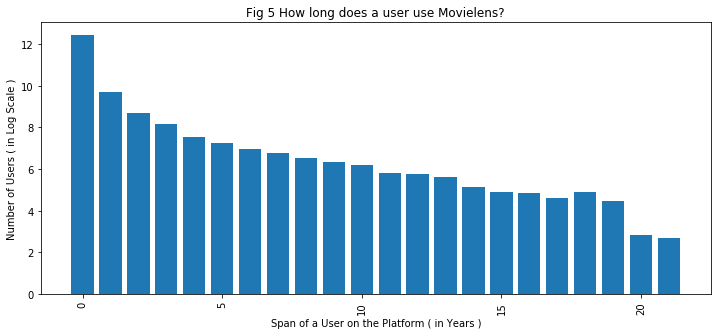

In [104]:
plt.figure(figsize=(12,5))
plt.bar(dff.Span, dff.Counts )
plt.xticks(rotation = 90)
plt.xlabel('Span of a User on the Platform ( in Years )')
plt.ylabel('Number of Users ( in Log Scale )')
plt.title('Fig 5 How long does a user use Movielens?')
plt.show()

> **Observations: **
- Majority of the Users use the platform for rating for only single year. It is expected as it is an academic dataset and not a commercial product which monitors its users over the years.
- This provides an interesting challenge in which the older movies will tend to be the most rated as new movies only have a fraction of overall users to receive ratings from.